In [109]:
import requests
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# cd documents/nss/projects/Python_Projects/music_matters/Notebooks

Things to look into:
 - top venues
 - top cover song by venue
 - percentage of cover to total per city (pie chart)
 - percentage of cover to total per venue 
 - top 10 covered songs overall
 - top 10 covered artists overall

In [2]:
data={'Cities':['New York', 'Nashville', 'Austin', 'Los Angeles', 'Chicago', 
           'Las Vegas', 'Denver', 'San Fransicso', 'Seattle', 'Portland'], 
 'States': ['NY', 'TN', 'TX', 'CA', 'IL', 'NV', 'CO', 'CA', 'WA', 'OR'], 
      'Number of Setlists':[8155, 2225, 4369, 8021, 5683, 4327, 3063, 2565, 3186, 2362]}


df=pd.DataFrame(data)

df['Number of Requests']=df['Number of Setlists']/20
df

,Cities,States,Number of Setlists,Number of Requests
0,New York,NY,8155,407.75
1,Nashville,TN,2225,111.25
2,Austin,TX,4369,218.45
3,Los Angeles,CA,8021,401.05
4,Chicago,IL,5683,284.15
5,Las Vegas,NV,4327,216.35
6,Denver,CO,3063,153.15
7,San Fransicso,CA,2565,128.25
8,Seattle,WA,3186,159.30
9,Portland,OR,2362,118.10


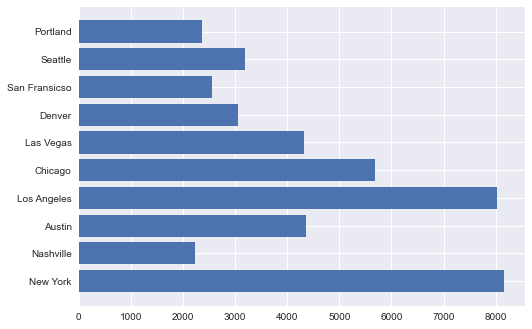

In [235]:
# US cities
plt.barh(df['Cities'],df['Number of Setlists'])
plt.show()

In [237]:
non_us_cities = {'Cities': ['London', 'Paris', 'Toronto', 'Buenos Aires', 'Manchester', 'Brussels', 'Berlin', 'Barcelona', 'Amsterdam', 'Antwerp','Glasgow'], 
        'Country_Code': ['GB', 'FR', 'CA', 'AR', 'GB', 'BE', 'DE','ES', 'NL', 'BE', 'GB'], 
        'Number of Setlists':[8409,3791,3788,3480,3059,2634,2504,2417,2235,2215,2018]      
       }



non_us_cities_df=pd.DataFrame(non_us_cities)

non_us_cities_df['Number of Requests']=non_us_cities_df['Number of Setlists']/20
non_us_cities_df

,Cities,Country_Code,Number of Setlists,Number of Requests
0,London,GB,8409,420.45
1,Paris,FR,3791,189.55
2,Toronto,CA,3788,189.40
3,Buenos Aires,AR,3480,174.00
4,Manchester,GB,3059,152.95
5,Brussels,BE,2634,131.70
6,Berlin,DE,2504,125.20
7,Barcelona,ES,2417,120.85
8,Amsterdam,NL,2235,111.75
9,Antwerp,BE,2215,110.75


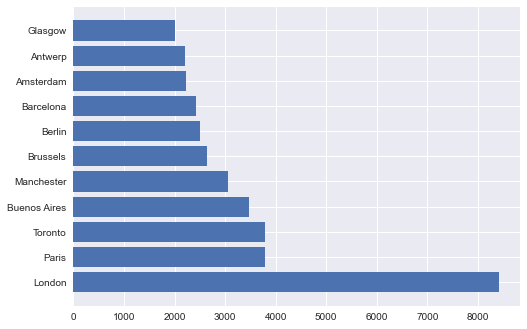

In [238]:
plt.barh(non_us_cities_df['Cities'],non_us_cities_df['Number of Setlists'])
plt.show()

## Need to redo US cities to have country in the dataframes. 

still need: portlad, seattle, new_york, los_angeles, austin, chicago, denver, las_vegas, san_francisco

In [3]:
portland=pd.read_excel('../Data/music_matters_portland.xlsx')
portland['city'].value_counts()

Realized that by Portland, they also included concerts from the surrounding area. Decided to only focus on concerts in the proper city area. 

In [341]:
portland = portland[portland['city']=='Portland']
portland['city'].value_counts()

Portland    11641
Name: city, dtype: int64

In [344]:
seattle=pd.read_excel('../Data/music_matters_seattle.xlsx')
seattle = seattle[seattle['city']=='Seattle']

In [127]:
nashville=pd.read_excel('../Data/music_matters_nashville.xlsx')
nashville = nashville[nashville['city']=='Nashville']

In [345]:
new_york=pd.read_excel('../Data/music_matters_new_york.xlsx')
new_york = new_york[new_york['city']=='New York']

In [346]:
los_angeles =pd.read_excel('../Data/music_matters_los_angeles.xlsx')
los_angeles = los_angeles[los_angeles['city']=='Los Angeles']

In [347]:
austin =pd.read_excel('../Data/music_matters_austin.xlsx')
austin = austin[austin['city']=='Austin']

In [348]:
chicago =pd.read_excel('../Data/music_matters_chicago.xlsx')
chicago = chicago[chicago['city']=='Chicago']

In [349]:
denver =pd.read_excel('../Data/music_matters_denver.xlsx')
denver = denver[denver['city']=='Denver']

In [350]:
las_vegas =pd.read_excel('../Data/music_matters_las_vegas.xlsx')
las_vegas = las_vegas[las_vegas['city']=='Las Vegas']

In [342]:
# las_vegas['country']= {'country':[country]}



In [343]:
# country = []

# for x in range(len(las_vegas)):
#     country.append("United States")

In [351]:
san_francisco =pd.read_excel('../Data/music_matters_san_francisco.xlsx')
san_francisco = san_francisco[san_francisco['city']=='San Francisco']

## Non US Cities

In [115]:
paris =pd.read_excel('../Data/music_matters_paris.xlsx')
paris = paris[paris['city']=='Paris']

In [142]:
toronto =pd.read_excel('../Data/music_matters_toronto.xlsx')
toronto = toronto[toronto['city']=='Toronto']

In [250]:
manchester =pd.read_excel('../Data/music_matters_manchester.xlsx')
manchester = manchester[manchester['city']=='Manchester']

In [276]:
london =pd.read_excel('../Data/music_matters_london.xlsx')
london = london[london['city']=='London']

In [338]:
buenos_aires =pd.read_excel('../Data/music_matters_buenos_aires.xlsx')
buenos_aires = buenos_aires[buenos_aires['city']=='Buenos Aires']

In [318]:
berlin =pd.read_excel('../Data/music_matters_berlin.xlsx')
berlin = berlin[berlin['city']=='Berlin']

In [310]:
brussels =pd.read_excel('../Data/music_matters_brussels.xlsx')
brussels = brussels[brussels['city']=='Brussels']

In [317]:
barcelona =pd.read_excel('../Data/music_matters_barcelona.xlsx')
barcelona= barcelona[barcelona['city']=='Barcelona']

In [353]:
amsterdam =pd.read_excel('../Data/music_matters_amsterdam.xlsx')
amsterdam = amsterdam[amsterdam['city']=='Amsterdam']

In [355]:
antwerp =pd.read_excel('../Data/music_matters_antwerp.xlsx')
antwerp = antwerp[antwerp['city']=='Antwerp']

In [356]:
# need to add bueno_aires, berlin, amsterdam, and antwerp

concat = pd.concat([new_york, nashville, seattle, portland, los_angeles, chicago, austin, denver, las_vegas, san_francisco, paris, toronto, manchester, london, brussels, berlin, barcelona, buenos_aires, amsterdam, antwerp], ignore_index=True)

In [357]:
concat

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Did I Make You Up?,original,NaN
1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Brighton,original,NaN
2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Death by Rock and Roll,original,NaN
3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Since You're Gone,original,NaN
4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Only Love Can Save Me Now,original,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324828,2b88444e,g43ce8b17,25-02-2022,2022-02-27T16:03:03.574+0000,BLUAI,Kavka Zappa,4bd3cfa6,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Dime Store,original,NaN
324829,2b88444e,g43ce8b17,25-02-2022,2022-02-27T16:03:03.574+0000,BLUAI,Kavka Zappa,4bd3cfa6,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Blue Moon,original,NaN
324830,2b88444e,g43ce8b17,25-02-2022,2022-02-27T16:03:03.574+0000,BLUAI,Kavka Zappa,4bd3cfa6,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Hate You,original,NaN
324831,b887582,g1bc1d514,02-02-2022,2022-02-15T15:05:23.516+0000,Metejoor,Nostalgie,43d25b17,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Dit is wat mijn mama zei,original,NaN


In [358]:
concat['original_vs_cover'] = np.where(concat['cover']=='original', 'Original', 'Cover')
concat

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Did I Make You Up?,original,Original
1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Brighton,original,Original
2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Death by Rock and Roll,original,Original
3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Since You're Gone,original,Original
4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Only Love Can Save Me Now,original,Original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324828,2b88444e,g43ce8b17,25-02-2022,2022-02-27T16:03:03.574+0000,BLUAI,Kavka Zappa,4bd3cfa6,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Dime Store,original,Original
324829,2b88444e,g43ce8b17,25-02-2022,2022-02-27T16:03:03.574+0000,BLUAI,Kavka Zappa,4bd3cfa6,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Blue Moon,original,Original
324830,2b88444e,g43ce8b17,25-02-2022,2022-02-27T16:03:03.574+0000,BLUAI,Kavka Zappa,4bd3cfa6,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Hate You,original,Original
324831,b887582,g1bc1d514,02-02-2022,2022-02-15T15:05:23.516+0000,Metejoor,Nostalgie,43d25b17,Antwerp,Antwerp,Belgium,BE.AN,BE,51.217000,4.417000,Dit is wat mijn mama zei,original,Original


In [359]:
concat['state'].value_counts()

England                            67179
California                         40661
Illinois                           26527
New York                           24561
Île-de-France                      20255
Ontario                            19259
Texas                              18029
Washington                         14341
Berlin                             14191
Tennessee                          13385
Colorado                           12219
Autonomous City of Buenos Aires    11660
Oregon                             11641
North Holland                      11305
Catalonia                           7958
Nevada                              6274
Brussels-Capital Region             3739
Antwerp                             1649
Name: state, dtype: int64

In [360]:
concat['city'].value_counts()

London           48786
Chicago          26527
Los Angeles      26283
New York         24561
Paris            20255
Toronto          19259
Manchester       18393
Austin           18029
San Francisco    14378
Seattle          14341
Berlin           14191
Nashville        13385
Denver           12219
Buenos Aires     11660
Portland         11641
Amsterdam        11305
Barcelona         7958
Las Vegas         6274
Brussels          3739
Antwerp           1649
Name: city, dtype: int64

<AxesSubplot:>

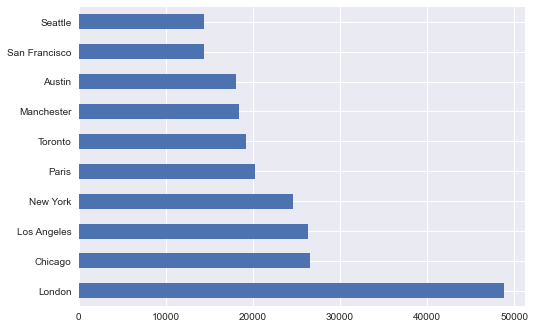

In [361]:
concat['city'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='barh')

Text(0.5, 1.0, 'Covers VS Originals')

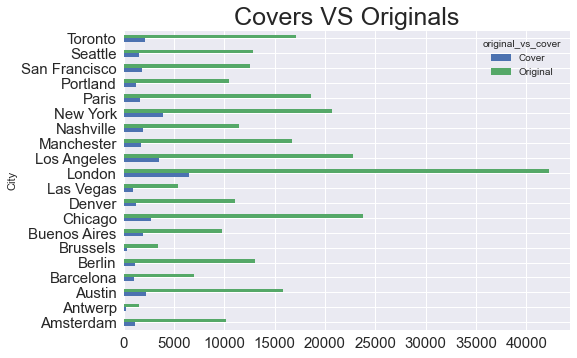

In [362]:
concat.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='City', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals',fontsize=25)
# plt.tight_layout()



In [363]:
top_10_cities = concat.groupby('city').count()
top_10_cities

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
city,,,,,,,,,,,,,,,,
Amsterdam,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11250,11305,11305
Antwerp,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1634,1649,1649
Austin,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,17822,18029,18029
Barcelona,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7926,7958,7958
Berlin,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14076,14191,14191
Brussels,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3732,3739,3739
Buenos Aires,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11564,11660,11660
Chicago,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26348,26527,26527
Denver,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12141,12219,12219


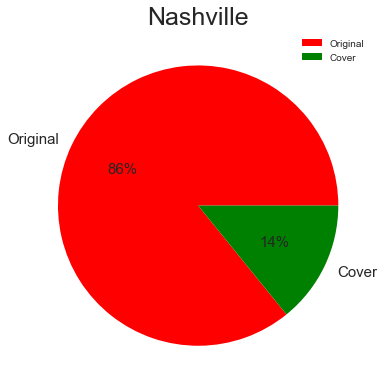

In [156]:
nashville = concat[concat['city']=='Nashville']

nashville['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Nashville',fontsize=25)
plt.tight_layout()

In [126]:
nashville['artist'].value_counts()

Jason Isbell and the 400 Unit    134
Derek Webb                       101
Carrie Underwood                  85
David Cook                        82
Lilly Hiatt                       66
                                ... 
Shawn Colvin                       1
Benny Mikula/The Lone Gnome        1
Gaither Vocal Band                 1
Jason Wilkes                       1
Charles Esten                      1
Name: artist, Length: 979, dtype: int64

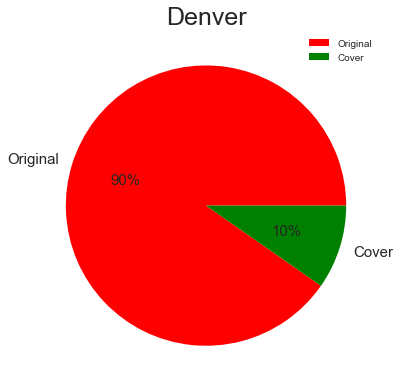

In [86]:
denver = concat[concat['city']=='Denver']

denver['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Denver',fontsize=25)
plt.tight_layout()

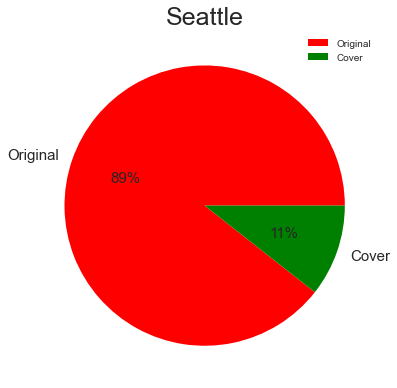

In [85]:
seattle = concat[concat['city']=='Seattle']

seattle['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Seattle',fontsize=25)
plt.tight_layout()

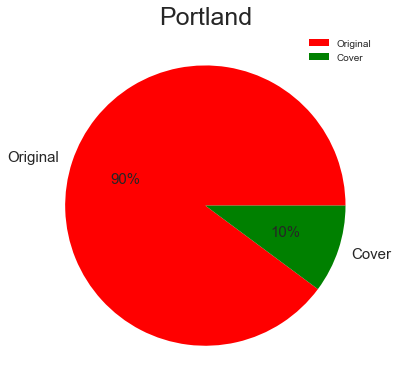

In [84]:
portland = concat[concat['city']=='Portland']

portland['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Portland',fontsize=25)
plt.tight_layout()

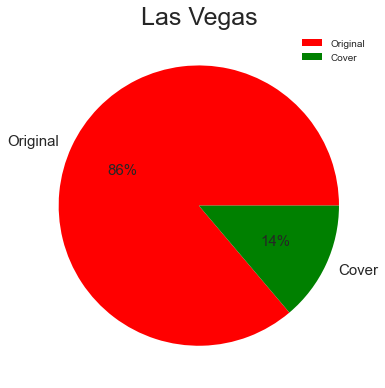

In [83]:
las_vegas = concat[concat['city']=='Las Vegas']

las_vegas['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Las Vegas',fontsize=25)
plt.tight_layout()

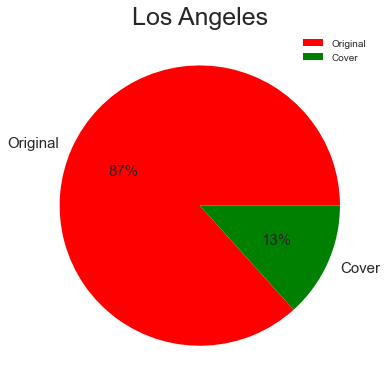

In [82]:
los_angeles = concat[concat['city']=='Los Angeles']

los_angeles['original_vs_cover'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Los Angeles',fontsize=25)
plt.tight_layout()

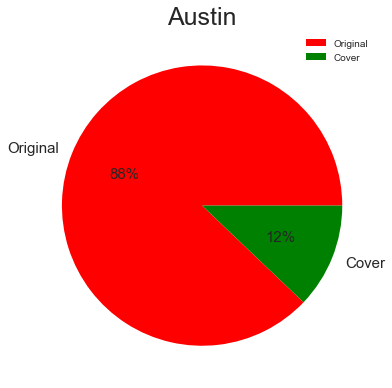

In [81]:
austin = concat[concat['city']=='Austin']

austin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Austin',fontsize=25)
plt.tight_layout()

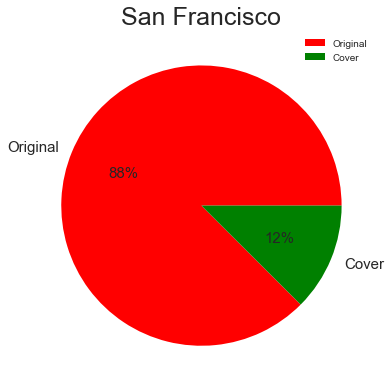

In [80]:
san_francisco = concat[concat['city']=='San Francisco']

san_francisco['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('San Francisco',fontsize=25)
plt.tight_layout()

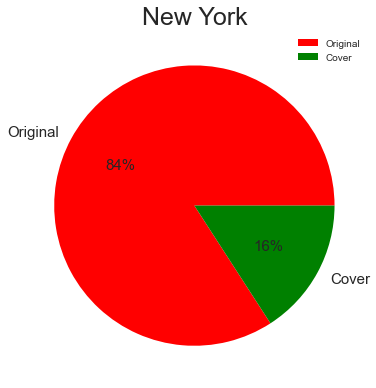

In [79]:
new_york = concat[concat['city']=='New York']

new_york['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('New York',fontsize=25)
plt.tight_layout()



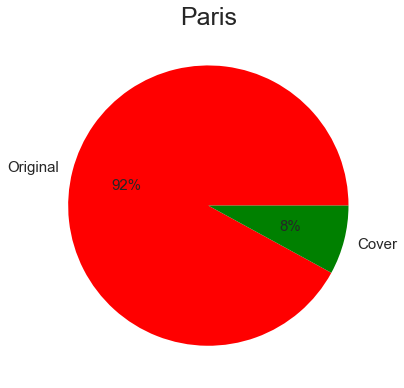

In [267]:
paris['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Paris',fontsize=25)
plt.tight_layout()

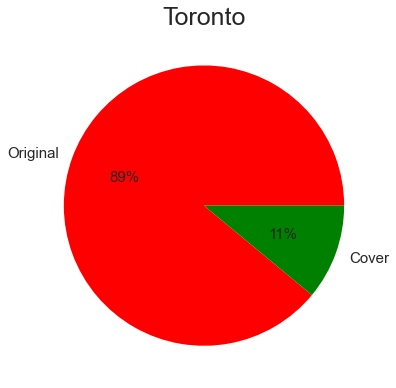

In [266]:
toronto = concat[concat['city']=='Toronto']
toronto['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Toronto',fontsize=25)
plt.tight_layout()

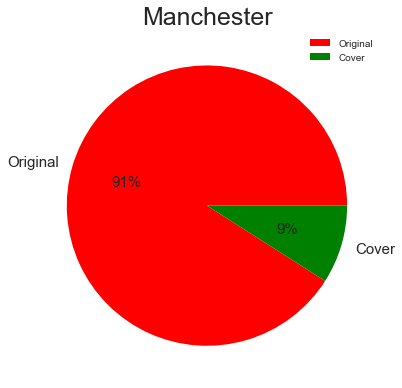

In [259]:
manchester = concat[concat['city']=='Manchester']

manchester['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Manchester',fontsize=25)
plt.tight_layout()

In [290]:
originals = concat[concat['original_vs_cover']=='Original']
originals.head()

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover,country,countryCode
0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,NY,40.714269,-74.005973,Did I Make You Up?,original,Original,NaN,NaN
1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,NY,40.714269,-74.005973,Brighton,original,Original,NaN,NaN
2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Death by Rock and Roll,original,Original,NaN,NaN
3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Since You're Gone,original,Original,NaN,NaN
4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Only Love Can Save Me Now,original,Original,NaN,NaN


In [261]:
covers = concat[concat['original_vs_cover']=='Cover']
covers.head()

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover,country,countryCode
5,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Loud Love,Soundgarden,Cover,NaN,NaN
19,43bcb7f3,g4be2535e,12-12-2022,2022-12-13T04:37:58.131+0000,Nick Perri & the Underground Thieves,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,"My My, Hey Hey (Out of the Blue)",Neil Young & Crazy Horse,Cover,NaN,NaN
26,7bbf429c,g5be25364,11-12-2022,2022-12-13T04:36:40.039+0000,Nick Perri & the Underground Thieves,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,"My My, Hey Hey (Out of the Blue)",Neil Young & Crazy Horse,Cover,NaN,NaN
47,3bbcb8ac,g73e262f1,11-12-2022,2022-12-12T14:52:50.396+0000,Bad Omens,Irving Plaza,4bd61f3e,New York,New York,NY,40.714269,-74.005973,Sympathy,Too Close to Touch,Cover,NaN,NaN
69,2bbcb8a6,g3be2685c,11-12-2022,2022-12-12T01:45:08.340+0000,Make Them Suffer,Irving Plaza,4bd61f3e,New York,New York,NY,40.714269,-74.005973,Sandstorm,Darude,Cover,NaN,NaN


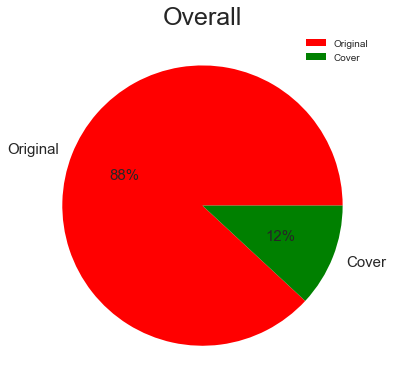

In [291]:
concat['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Overall',fontsize=25)
plt.tight_layout()
                        

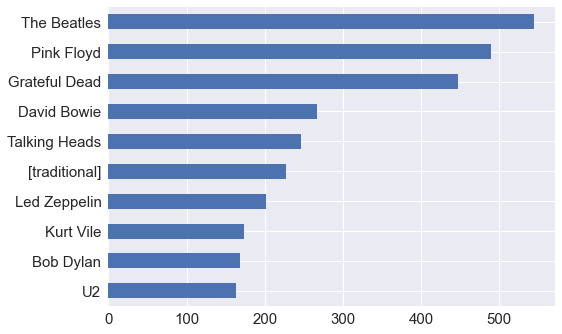

In [364]:
chart =covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

# plt.title('Top 10 Covered Artists',fontsize=25)
# plt.bar_label(chart.containers, size=11, label_type='center')
# plt.bar_label(chart.containers, size=11, label_type='center')
# plt.savefig("Eligibility_Categories.png")
# plt.show()

<AxesSubplot:>

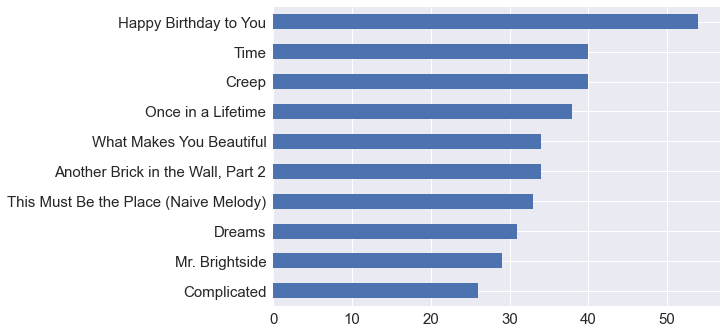

In [365]:
covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

# plt.title('Top 10 Covered Songs',fontsize=25)

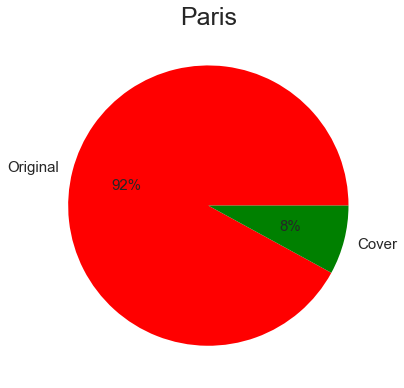

In [141]:
concat.groupby(['original_vs_cover', 'artist'])['song'].count()


original_vs_cover  artist                                      
Cover              (həd) p.e.                                        1
                   070 Shake                                         4
                   10,000 Maniacs                                    4
                   311                                               1
                   5 Seconds of Summer                               6
                                                                  ... 
Original           â€¦And You Will Know Us by the Trail of Dead     12
                   â€œWeird Alâ€ Yankovic                          77
                   ’68                                               6
                   “Weird Al” Yankovic                             133
                   …And You Will Know Us by the Trail of Dead        8
Name: song, Length: 6402, dtype: int64

In [166]:
# want to look at what venues have the highest proportion of covers to originals (group by cvo and venue)
# want to look at which artists play the most cover songs (group by cvo and artist)

versionid  eventdate  lastupdated  artist  venue  \
original_vs_cover ids                                                          
Cover             13884515          2          2            2       2      2   
                  13891529          1          1            1       1      1   
                  13892905          1          1            1       1      1   
                  23894043          1          1            1       1      1   
                  33880421          3          3            3       3      3   
...                               ...        ...          ...     ...    ...   
Original          bbfed5a          18         18           18      18     18   
                  bbfed62           1          1            1       1      1   
                  bbfedb2           1          1            1       1      1   
                  bbff182           5          5            5       5      5   
                  bbff9ee          16         16           16      16     16   

                            venue_id  city  state  stateCode  lat_coords  \
original_vs_cover ids                                                      
Cover             13884515         2     2      2          2           2   
                  13891529         1     1      1          1           1   
                  13892905         1     1      1          1           1   
                  23894043         1     1      1          1           1   
                  33880421         3     3      3          3           3   
...                              ...   ...    ...        ...         ...   
Original          bbfed5a         18    18     18         18          18   
                  bbfed62          1     1      1          1           1   
                  bbfedb2          1     1      1          1           1   
                  bbff182          5     5      5          5           5   
                  bbff9ee         16    16     16         16          16   

                            long_coords  song  cover  country  countryCode  
original_vs_cover ids                                                       
Cover             13884515            2     2      2        0            0  
                  13891529            1     1      1        0            0  
                  13892905            1     1      1        0            0  
                  23894043            1     1      1        0            0  
                  33880421            3     3      3        0            0  
...                                 ...   ...    ...      ...          ...  
Original          bbfed5a            18    18     18       18           18  
                  bbfed62             1     1      1        0            0  
                  bbfedb2             1     1      1        0            0  
                  bbff182             5     5      5        0            0  
                  bbff9ee            16    16     16        0            0  

[24907 rows x 15 columns]

<AxesSubplot:>

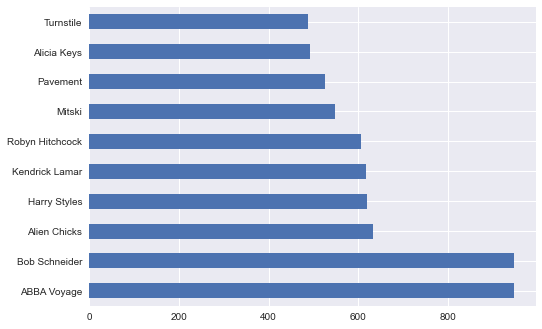

In [366]:
concat['artist'].value_counts().nlargest(10).plot(kind='barh')

In [369]:
harry_styles=concat[concat['artist']=='Harry Styles']
distribution = harry_styles.groupby('original_vs_cover').count()
distribution

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover
original_vs_cover,,,,,,,,,,,,,,,,
Cover,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
Original,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567


In [176]:

harry_styles_originals = harry_styles[harry_styles['original_vs_cover']=='Original']
# percentage =harry_styles_covers/harry_styles_originals
# percentage

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover,country,countryCode


In [371]:
harry_styles_covers

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover,country,countryCode
6913,43b07763,g63fa2e6f,21-09-2022,2022-09-22T04:06:32.142+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
7561,63b02afb,g63fa329f,15-09-2022,2022-09-22T01:41:55.152+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
7707,5bb03b98,g3bfd7884,14-09-2022,2022-09-15T03:22:23.073+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8049,73b0e231,g73fdda75,10-09-2022,2022-09-11T12:46:59.264+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,Happy Birthday to You,Mildred J. Hill & Patty Hill,Cover,NaN,NaN
8053,73b0e231,g73fdda75,10-09-2022,2022-09-11T12:46:59.264+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8309,5bb0f7fc,g1bfa3134,08-09-2022,2022-09-21T22:58:14.791+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,Happy Birthday to You,Mildred J. Hill & Patty Hill,Cover,NaN,NaN
8313,5bb0f7fc,g1bfa3134,08-09-2022,2022-09-21T22:58:14.791+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8435,1bb0fdfc,g6bfa72ae,07-09-2022,2022-09-24T10:49:31.393+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8625,5bb08ffc,g3fd9d23,03-09-2022,2022-09-09T01:53:29.040+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8709,3b095b7,g7bfdba8c,02-09-2022,2022-09-08T02:27:57.814+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN


In [372]:
harry_styles_originals

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover,country,countryCode


In [298]:
harry_styles

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover,country,countryCode
6902,43b07763,g63fa2e6f,21-09-2022,2022-09-22T04:06:32.142+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,Daydreaming,original,Original,NaN,NaN
6903,43b07763,g63fa2e6f,21-09-2022,2022-09-22T04:06:32.142+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,Golden,original,Original,NaN,NaN
6904,43b07763,g63fa2e6f,21-09-2022,2022-09-22T04:06:32.142+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,Adore You,original,Original,NaN,NaN
6905,43b07763,g63fa2e6f,21-09-2022,2022-09-22T04:06:32.142+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,Daylight,original,Original,NaN,NaN
6906,43b07763,g63fa2e6f,21-09-2022,2022-09-22T04:06:32.142+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,Keep Driving,original,Original,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258171,33b76449,g63f6863b,24-05-2022,2022-05-29T18:09:24.269+0000,Harry Styles,O2 Academy Brixton,2bd6c8ea,London,England,ENG,51.508415,-0.125533,Daydreaming,original,Original,United Kingdom,GB
258172,33b76449,g63f6863b,24-05-2022,2022-05-29T18:09:24.269+0000,Harry Styles,O2 Academy Brixton,2bd6c8ea,London,England,ENG,51.508415,-0.125533,Keep Driving,original,Original,United Kingdom,GB
258173,33b76449,g63f6863b,24-05-2022,2022-05-29T18:09:24.269+0000,Harry Styles,O2 Academy Brixton,2bd6c8ea,London,England,ENG,51.508415,-0.125533,Satellite,original,Original,United Kingdom,GB
258174,33b76449,g63f6863b,24-05-2022,2022-05-29T18:09:24.269+0000,Harry Styles,O2 Academy Brixton,2bd6c8ea,London,England,ENG,51.508415,-0.125533,Boyfriends,original,Original,United Kingdom,GB


In [181]:
harry_styles_covers = harry_styles[harry_styles['original_vs_cover']=='Cover']
harry_styles_covers

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover,country,countryCode
6913,43b07763,g63fa2e6f,21-09-2022,2022-09-22T04:06:32.142+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
7561,63b02afb,g63fa329f,15-09-2022,2022-09-22T01:41:55.152+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
7707,5bb03b98,g3bfd7884,14-09-2022,2022-09-15T03:22:23.073+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8049,73b0e231,g73fdda75,10-09-2022,2022-09-11T12:46:59.264+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,Happy Birthday to You,Mildred J. Hill & Patty Hill,Cover,NaN,NaN
8053,73b0e231,g73fdda75,10-09-2022,2022-09-11T12:46:59.264+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8309,5bb0f7fc,g1bfa3134,08-09-2022,2022-09-21T22:58:14.791+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,Happy Birthday to You,Mildred J. Hill & Patty Hill,Cover,NaN,NaN
8313,5bb0f7fc,g1bfa3134,08-09-2022,2022-09-21T22:58:14.791+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8435,1bb0fdfc,g6bfa72ae,07-09-2022,2022-09-24T10:49:31.393+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8625,5bb08ffc,g3fd9d23,03-09-2022,2022-09-09T01:53:29.040+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN
8709,3b095b7,g7bfdba8c,02-09-2022,2022-09-08T02:27:57.814+0000,Harry Styles,Madison Square Garden,23d63cc7,New York,New York,NY,40.714269,-74.005973,What Makes You Beautiful,One Direction,Cover,NaN,NaN


In [373]:
harry_styles.groupby('original_vs_cover')['song'].value_counts(normalize=True).mul(100)

original_vs_cover  song                        
Cover              What Makes You Beautiful        71.698113
                   Happy Birthday to You           22.641509
                   Bohemian Rhapsody                1.886792
                   Feliz cumpleaños                 1.886792
                   Wet Dream                        1.886792
Original           Daylight                         7.407407
                   Late Night Talking               7.407407
                   Golden                           7.054674
                   Adore You                        6.878307
                   Cinema                           6.878307
                   Keep Driving                     6.878307
                   Love of My Life                  6.878307
                   Matilda                          6.878307
                   Music for a Sushi Restaurant     6.878307
                   Satellite                        6.878307
                   Treat People With 

In [300]:
harry_styles['original_vs_cover'].value_counts(normalize=True).mul(100)

Original    91.382406
Cover        8.617594
Name: original_vs_cover, dtype: float64

In [208]:
concat.groupby('original_vs_cover')['state'].value_counts(normalize=True).mul(100)

original_vs_cover  state        
Cover              California       21.641273
                   New York         15.918467
                   Illinois         11.102488
                   Texas             8.925289
                   Ontario           8.667947
                   Tennessee         7.736612
                   Île-de-France     6.584698
                   Washington        6.208897
                   Colorado          4.840489
                   Oregon            4.832319
                   Nevada            3.541522
Original           California       19.358847
                   Illinois         13.033815
                   New York         11.312140
                   Île-de-France    10.205780
                   Ontario           9.381347
                   Texas             8.673517
                   Washington        7.018629
                   Tennessee         6.290544
                   Colorado          6.040368
                   Oregon            5.725047
 

In [273]:
nashville.groupby('original_vs_cover')['venue'].value_counts(normalize=True).mul(100)

original_vs_cover  venue                   
Cover              Ryman Auditorium            30.834213
                   Bridgestone Arena           10.506864
                   City Winery                  6.230201
                   The Basement East            6.071806
                   Private Venue                4.435058
                                                 ...    
Original           CMT Crossroads               0.008702
                   Cabana Taps                  0.008702
                   Margaritaville Nashville     0.008702
                   Random Sample                0.008702
                   WSMV Studios                 0.008702
Name: venue, Length: 157, dtype: float64

In [203]:
concat.groupby('state')['original_vs_cover'].value_counts(normalize=True).mul(100).round()

state          original_vs_cover
California     Original             87.0
               Cover                13.0
Colorado       Original             90.0
               Cover                10.0
Illinois       Original             90.0
               Cover                10.0
Nevada         Original             86.0
               Cover                14.0
New York       Original             84.0
               Cover                16.0
Ontario        Original             89.0
               Cover                11.0
Oregon         Original             90.0
               Cover                10.0
Tennessee      Original             86.0
               Cover                14.0
Texas          Original             88.0
               Cover                12.0
Washington     Original             89.0
               Cover                11.0
Île-de-France  Original             92.0
               Cover                 8.0
Name: original_vs_cover, dtype: float64

<AxesSubplot:ylabel='city,original_vs_cover'>

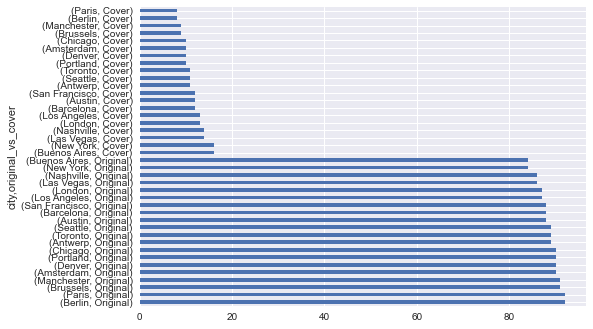

In [374]:
concat.groupby('city')['original_vs_cover'].value_counts(normalize=True).mul(100).round().sort_values(ascending=False).plot(kind='barh')



<AxesSubplot:ylabel='City'>

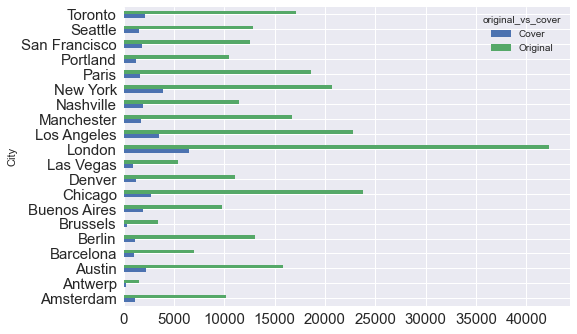

In [375]:
concat.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='City', legend=True, ylabel='', fontsize=15)


In [376]:
concat_1 = concat[['ids', 'country','original_vs_cover']]

In [379]:
concat_2 =concat_1.groupby(['country', 'original_vs_cover']).count()

In [385]:
concat_3 =concat_2.reset_index()
concat_3

,country,original_vs_cover,ids
0,Argentina,Cover,1923
1,Argentina,Original,9737
2,Belgium,Cover,524
3,Belgium,Original,4864
4,Canada,Cover,2122
5,Canada,Original,17137
6,France,Cover,1612
7,France,Original,18643
8,Germany,Cover,1110
9,Germany,Original,13081


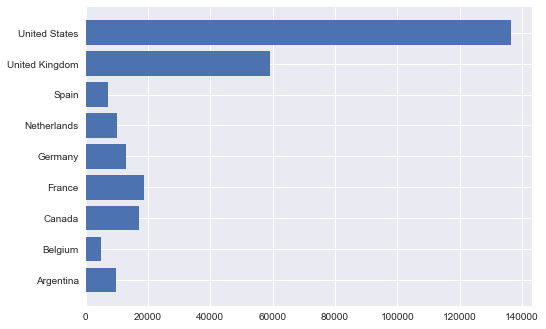

In [386]:
plt.barh(concat_3['country'], concat_3['ids'])
plt.show()

